In [ ]:
Baseball Case Study

Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop 
an algorithm that predicts the number of wins for a given team in the 2015 season based 
on several different indicators of success. There are 16 different features that will be 
used as the inputs to the machine learning and the output will be a value that represents 
the number of wins. 

Input features:Runs(R),at Bats(AB),Hits(H),Doubles(2B),Triples(3B),Home runs(HR),Walks(BB),Strikeouts(SO),Stolen Bases(SB),Runs Allowed(RA),
Earned Run Average(ERA),Shoutots(SHO),Saves(SV),Complete Game(CG) and Errors(E).

Output: Number of predicted Wins(W)
The output(target variable) is a number,therefore continuous data.This is a regression problem.


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\baseball.csv")
df.head()#extracting first five records of the dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [82]:
df.tail()
#extracting last five records of the dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [83]:
#checking the shape of the data
#there are 30 rows and 17 columns in the dataset
df.shape


(30, 17)

In [84]:
#Checking the data types of all columns
df.dtypes #All columns but ERA are integer type.ERA figures have decimal places therefore float type



W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [85]:
#Checking information about the dataset
df.info()#there are 17 columns in the data,16 of which are int64 except ERA which is Float64





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [86]:
#checking columns of dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [87]:
#Checking Duplicate value in  dataset
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [88]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

,No. of Unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [89]:
#Checking for null or missing values in the dataset
df.isnull().sum()# no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

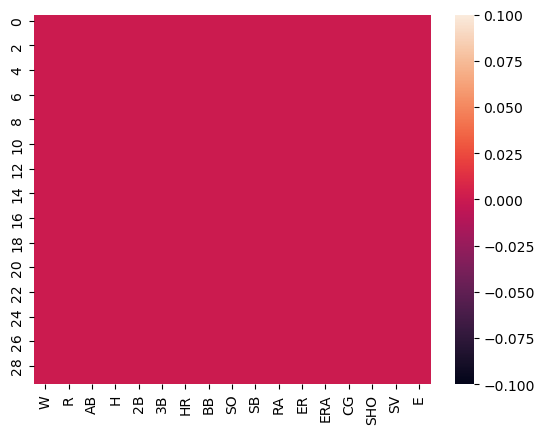

In [90]:
#visualize null using a heatmap
sns.heatmap(df.isnull())#visual confirmation of no null values 

In [92]:
#Statistical summary of numerical columns
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


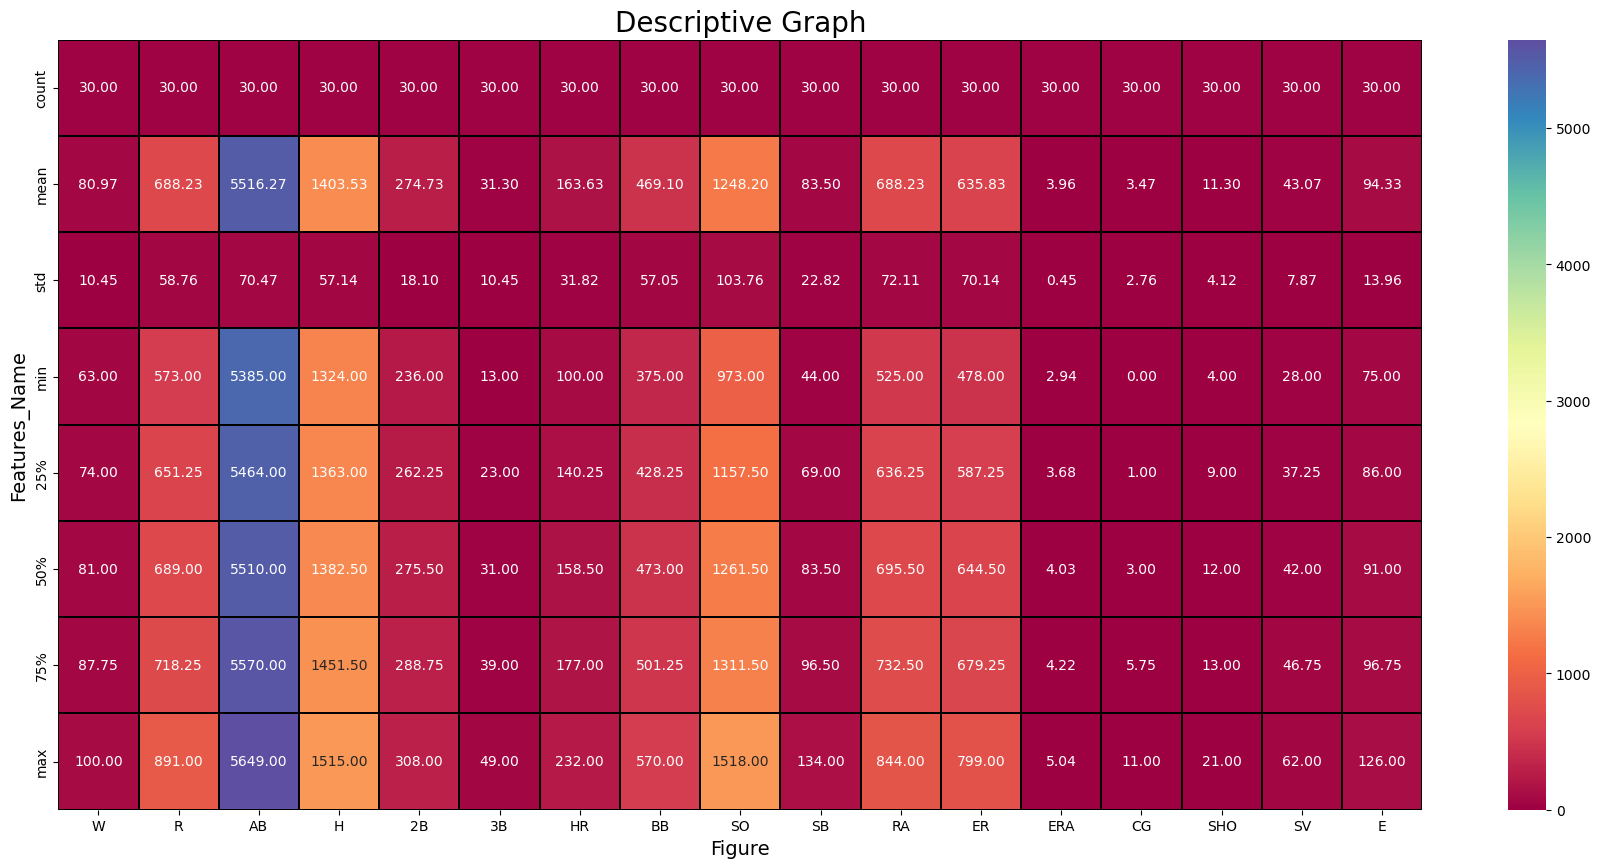

In [93]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [ ]:
Interpretation of the Statistical summary of dataset
#from the statistical description above the count of all columns are similar therefore no missing data values
#mean value of AB,E,H,3B,HR,CG and SV is greater than the median(second percentile)therefore the data is skewed to the right
#in columns RA,W,R,2B,BB,SO,ER,ERA,SHO the mean is less than the median therefore the data is skewed to the left
#in column SB the mean and median values are equal,this is perfect distribution
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data.                                                        

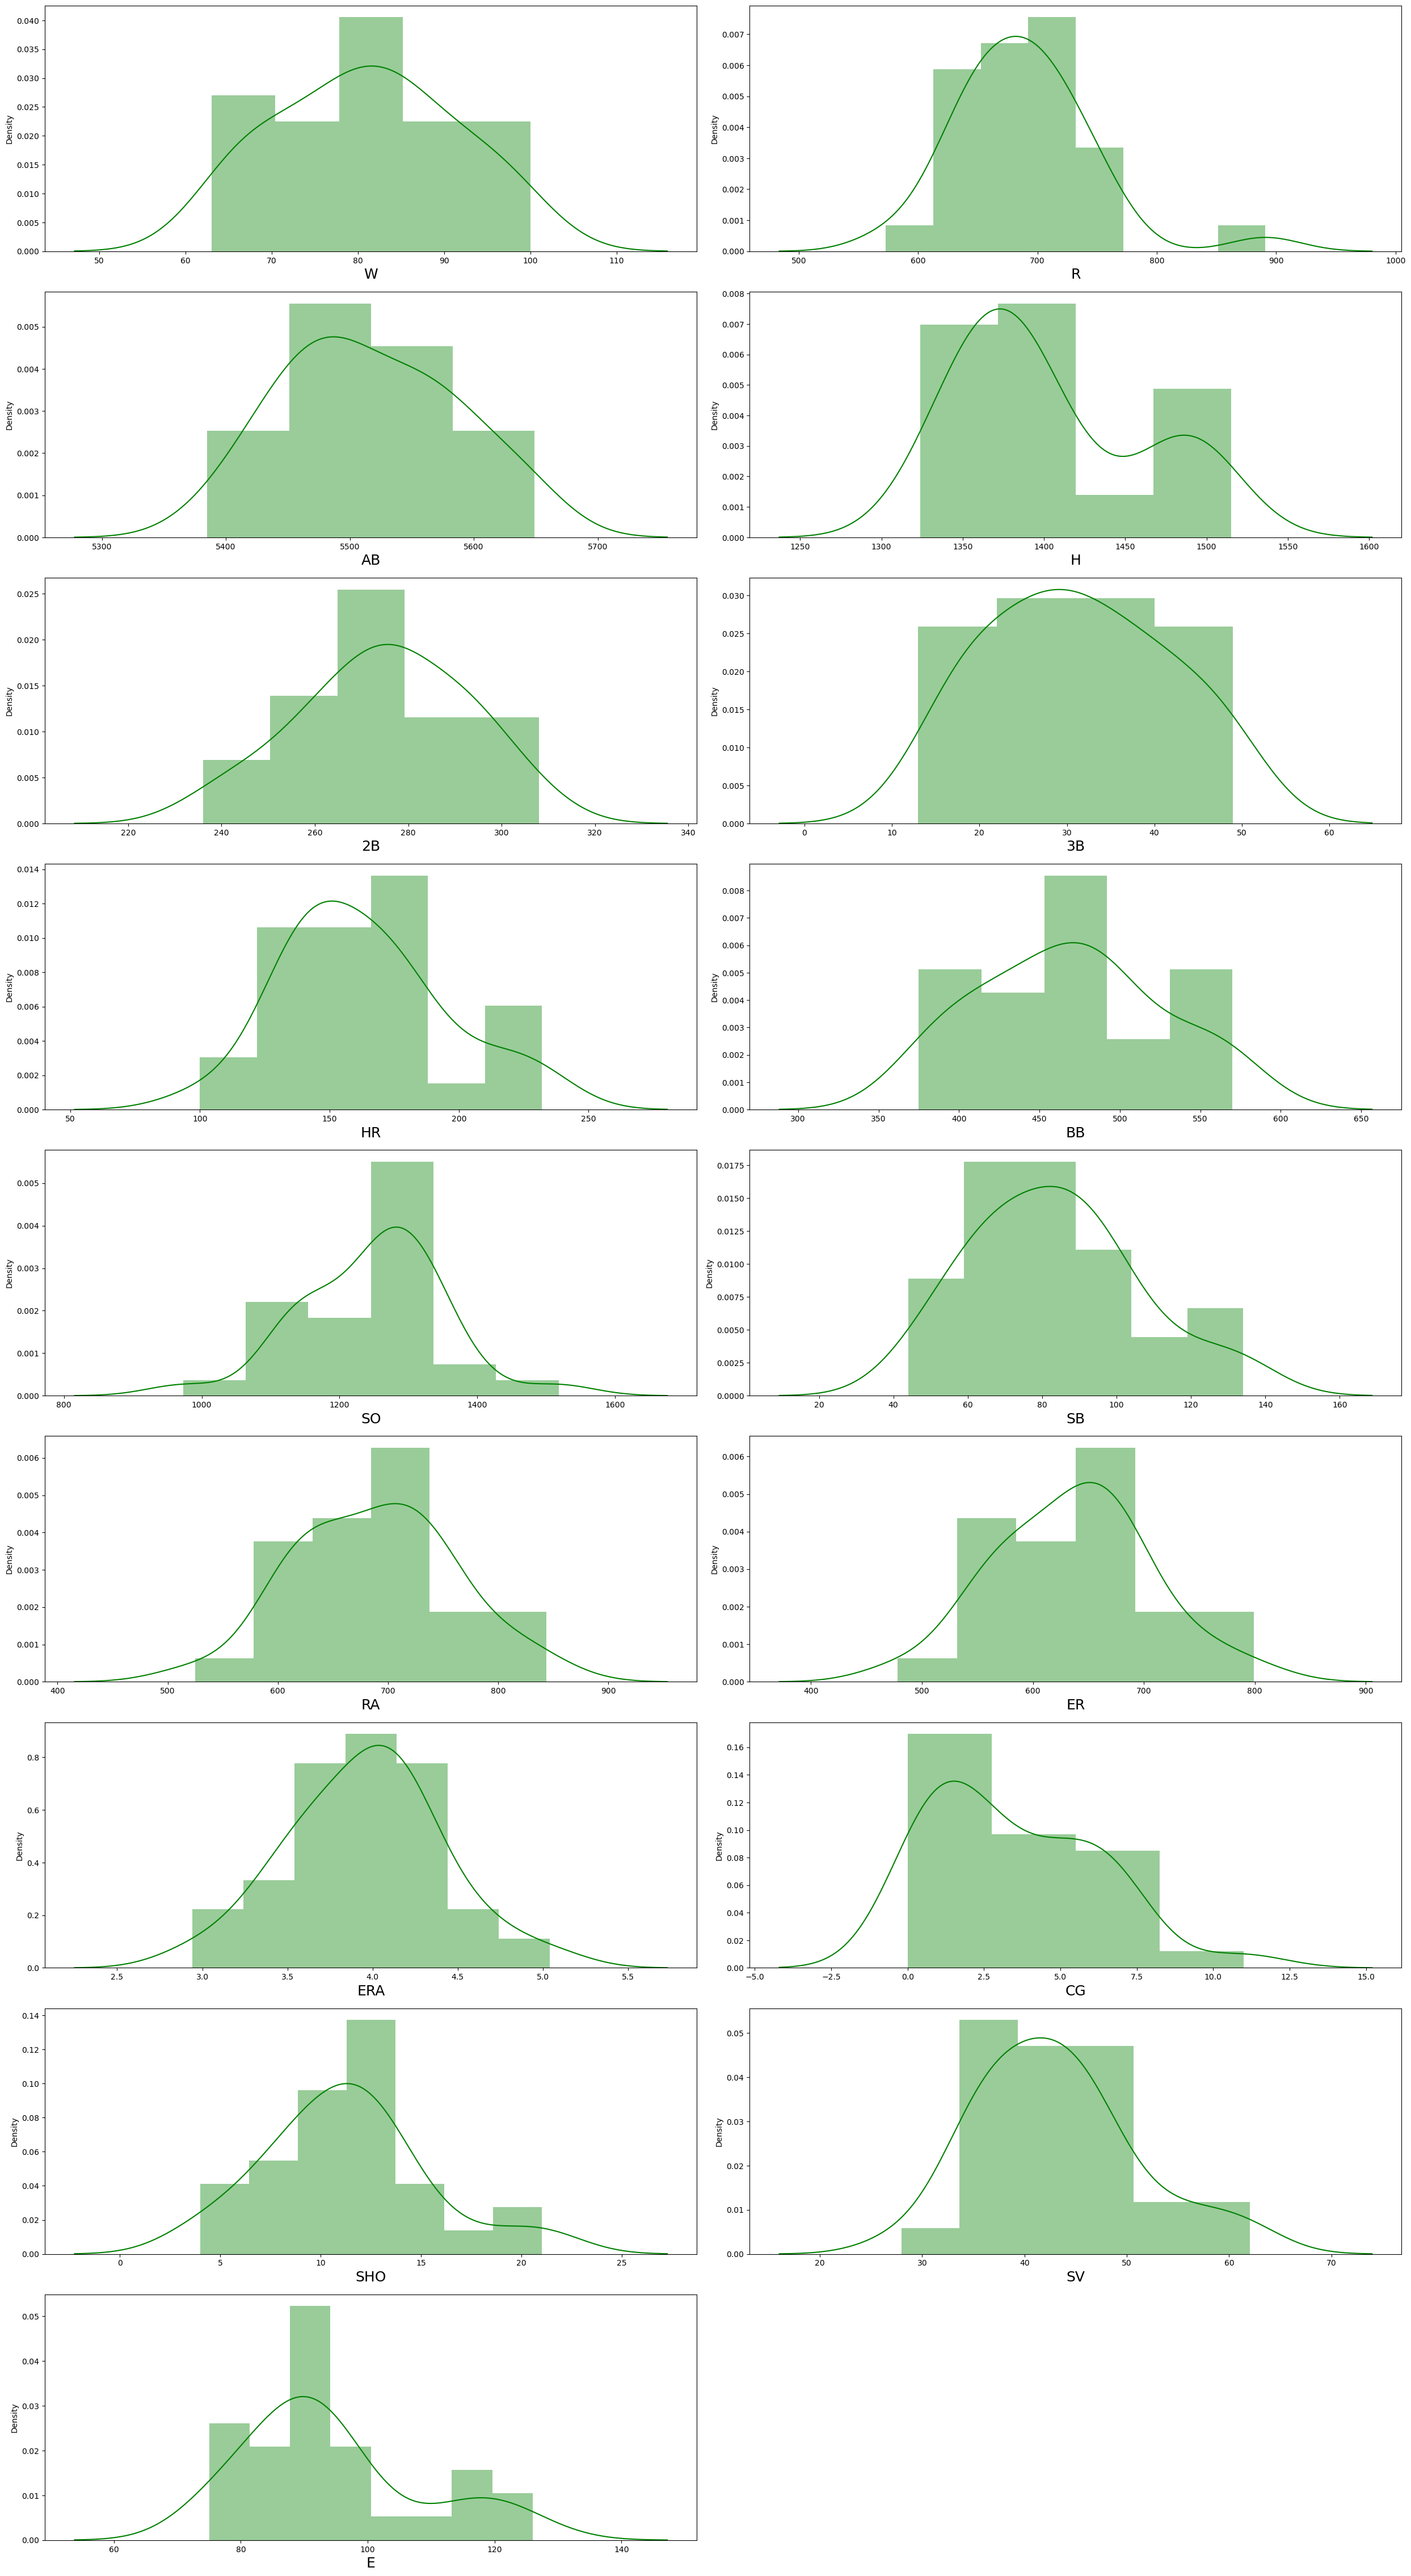

In [94]:
#Data Visualization -Univariate Analysis
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()#I can see all the columns are bell shaped(normally distributed) with the exception of R,SO,CG and E.

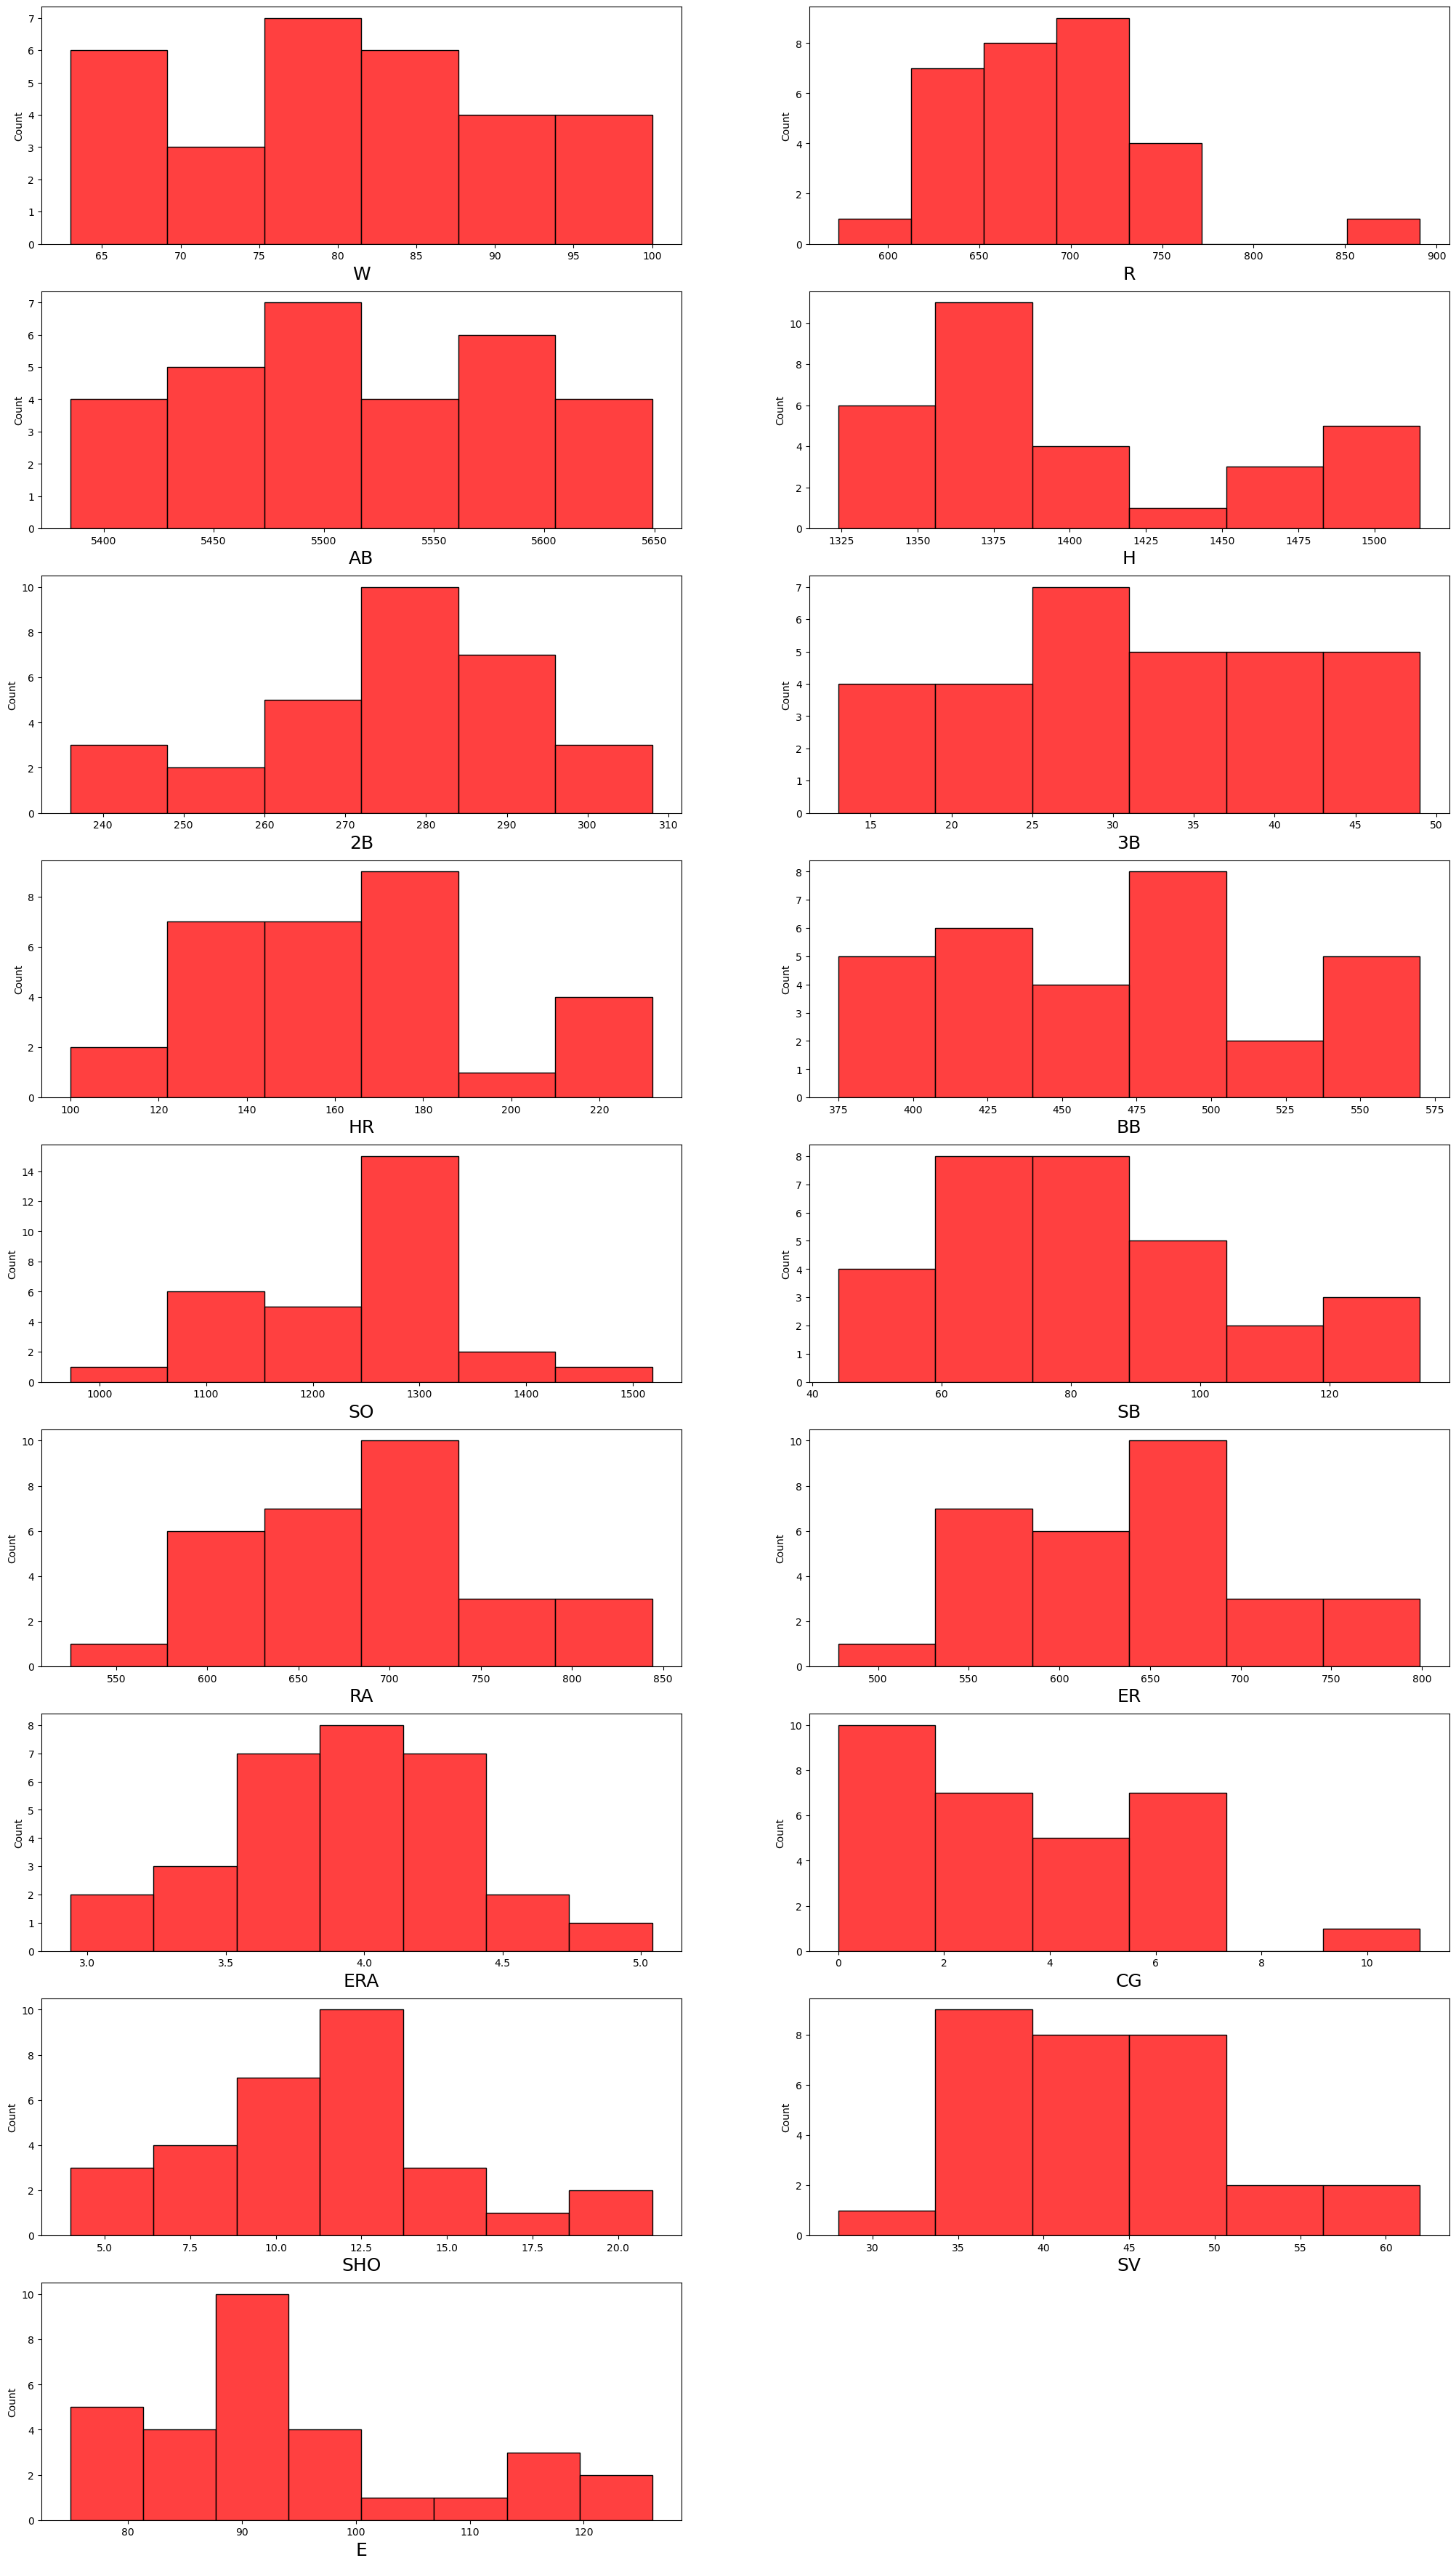

In [95]:
#Visualize distribution of data using histplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'red')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

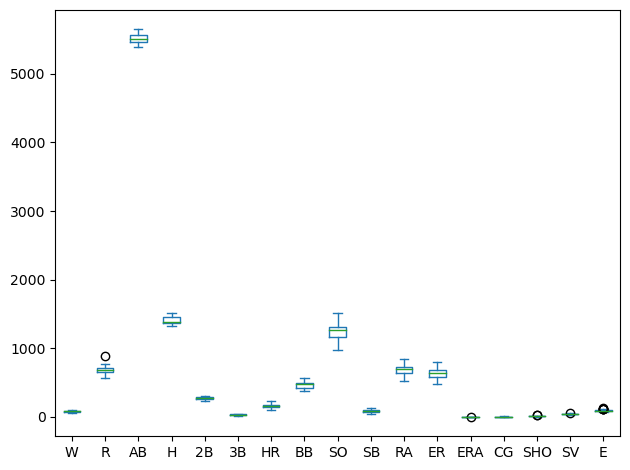

In [96]:
#Let's check data distribution and outliers using boxplot
df.plot(kind='box')
plt.tight_layout()#outliers are denoted by the circles on the columns as shown in the boxplot

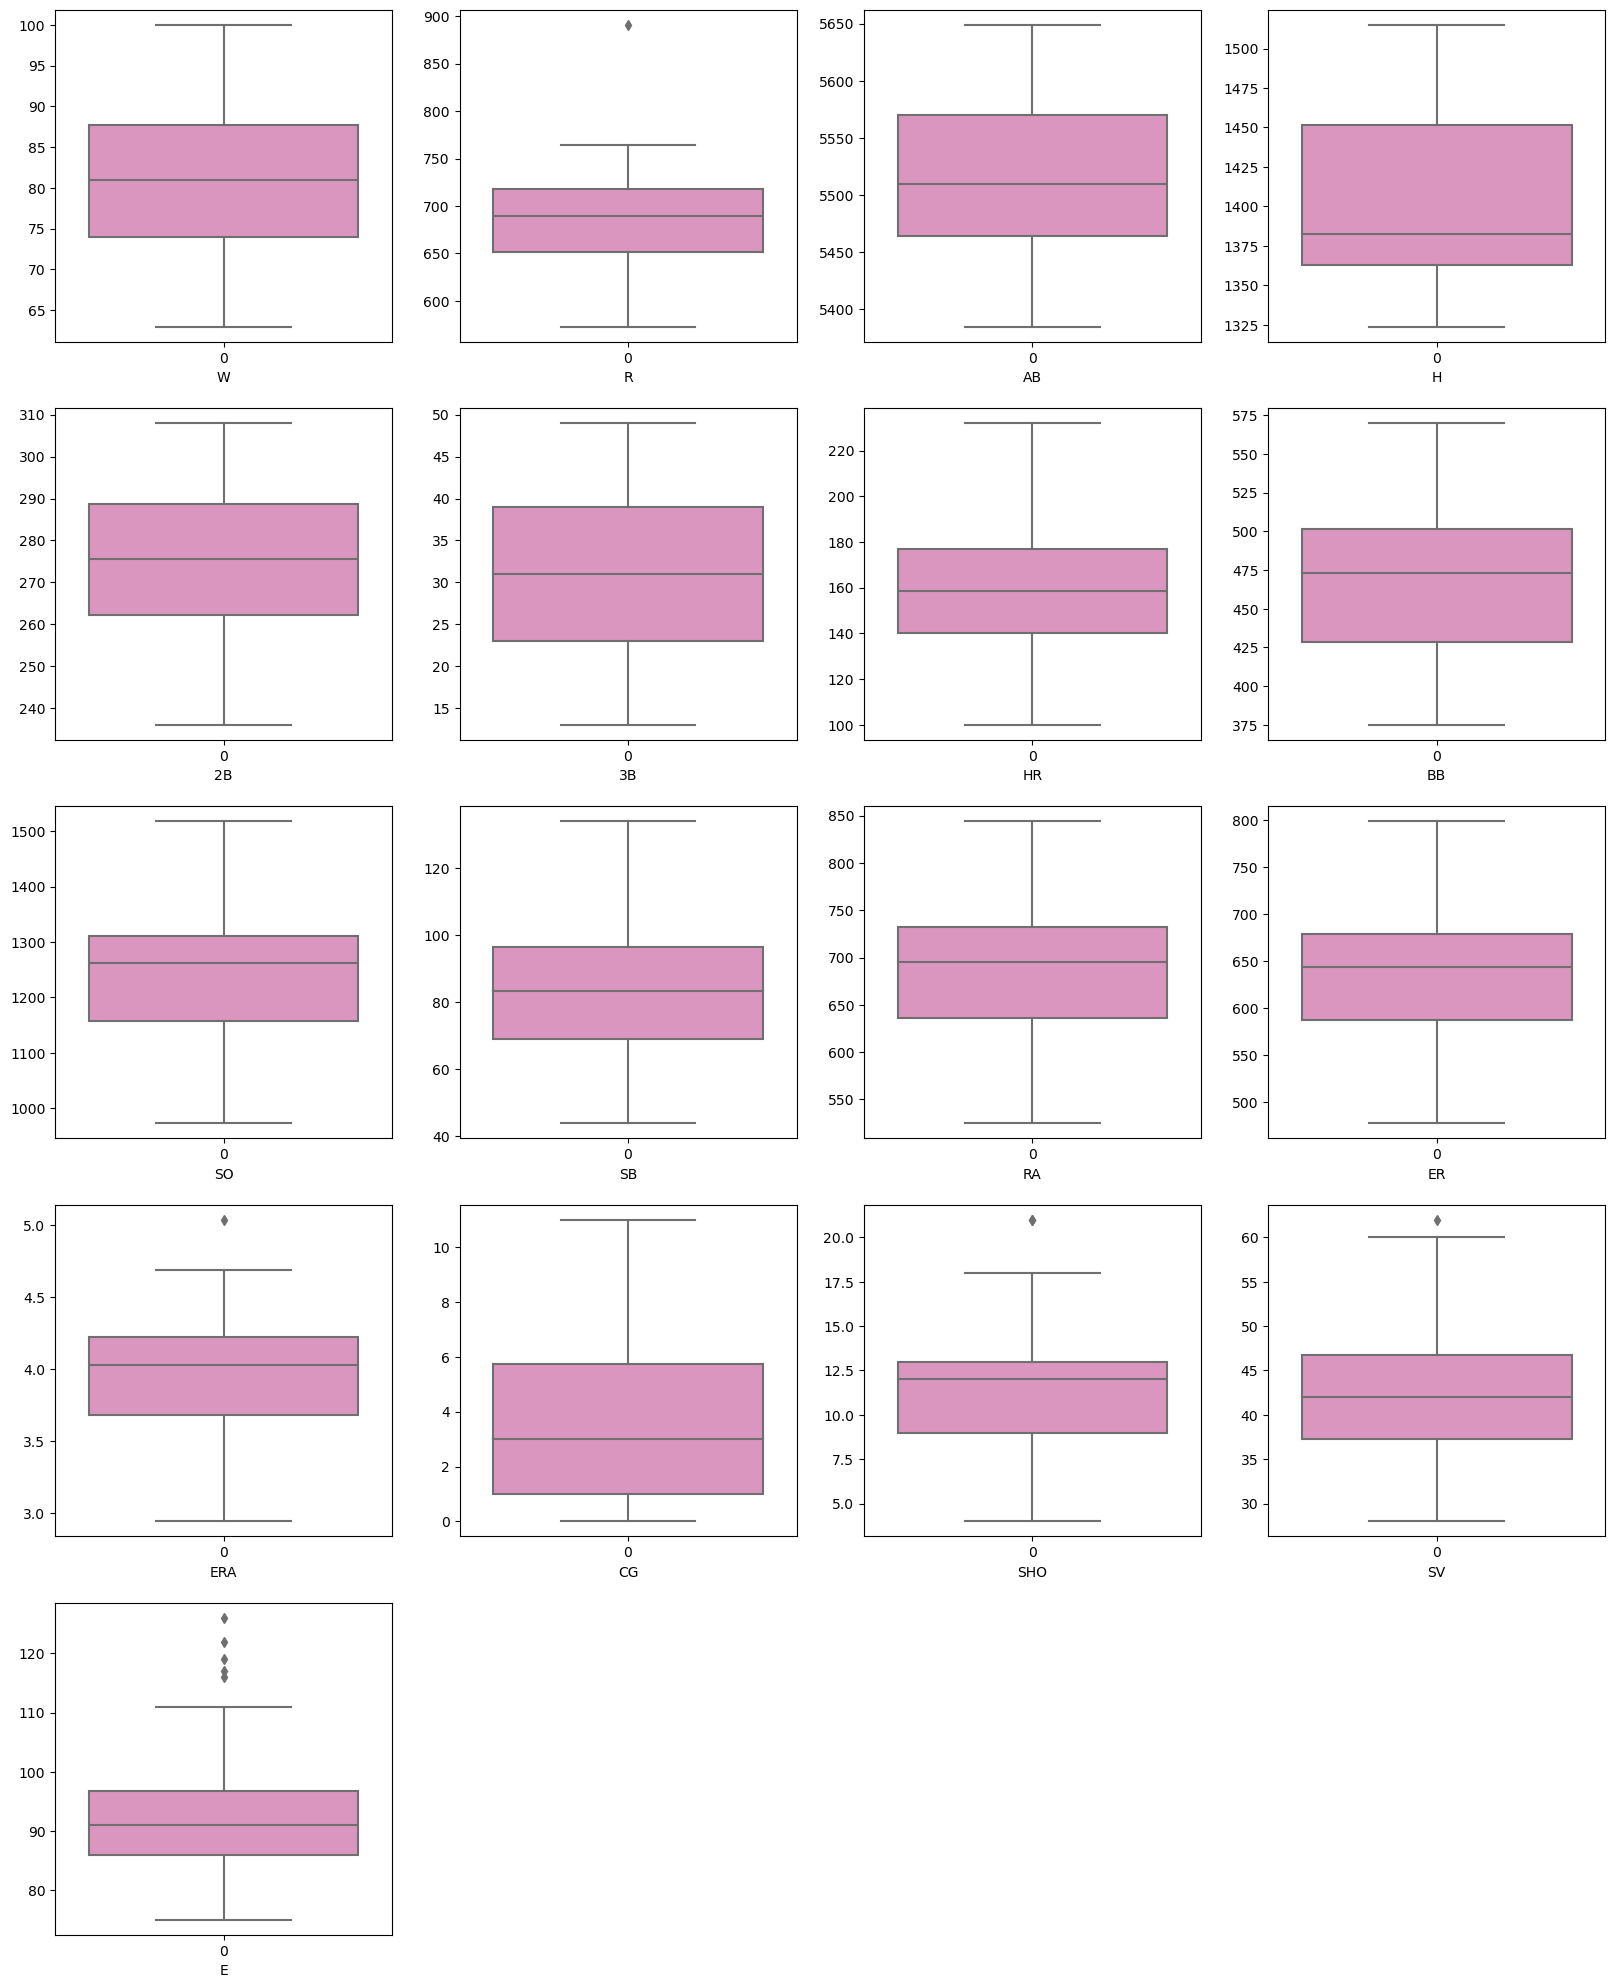

In [97]:
#Let's check data distribution and outliers using boxplot,a bigger presentation
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [ ]:
#As shown in boxplot R,ERA,SHO,SV and E input variable is having outliers in it.These will removed only from the input variables after complete visualisation of the data.

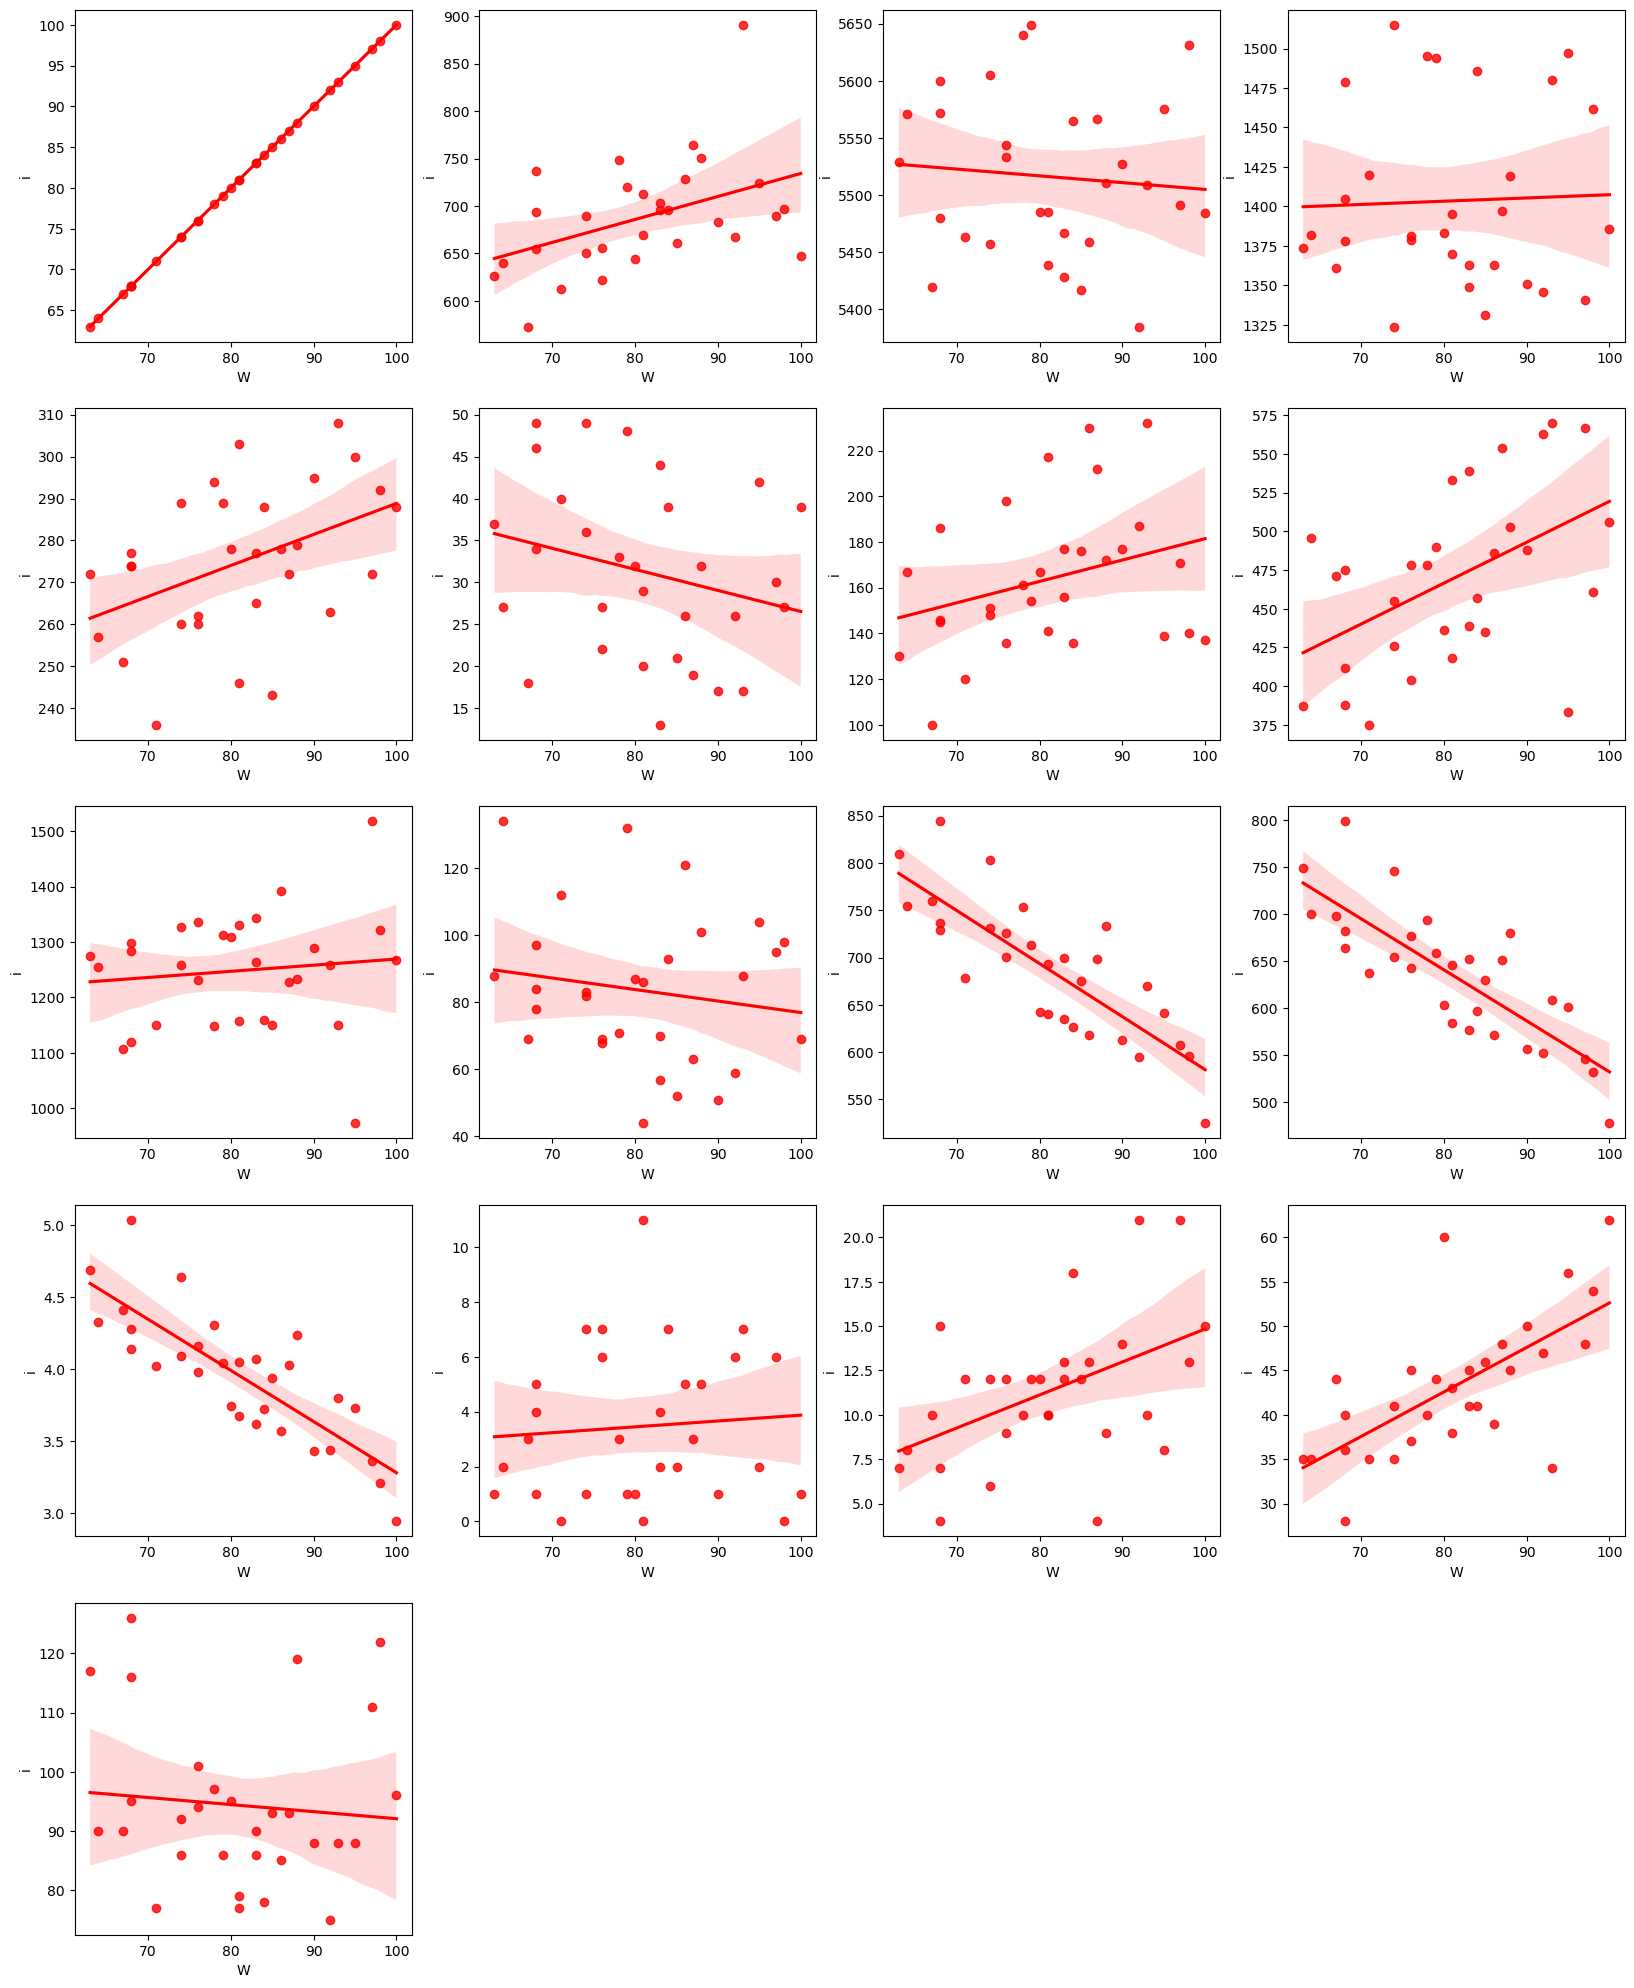

In [98]:
#Bivariate Analysis
plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='W',y=i,data=df, color='red')
        plt.xlabel("W")
        plt.ylabel('i')
    p+= 1
plt.show()
#As, we can see in plot SV,ERA,SHO and R is having almost linear relationship with W and other variables are having non linear relationship with target variable


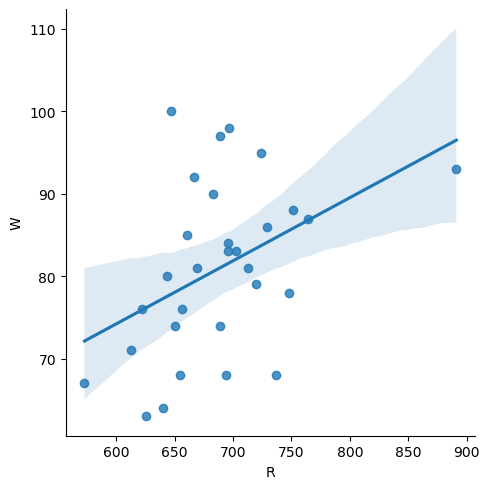

In [99]:
#Visualize relationship between Wins  and other variables using lmplot
#RA,ER,ERA have good relationsip with Win this is shown by the linear pattern of the data points. The other Columns have data points scattered.
sns.lmplot(x='R',y='W',data=df,palette='colorblind')

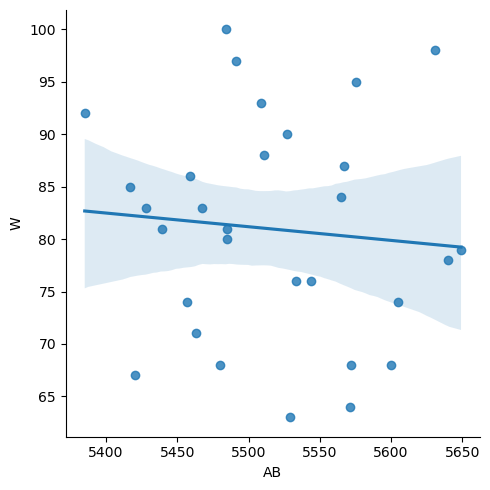

In [100]:

sns.lmplot(x='AB',y='W',data=df,palette='colorblind')

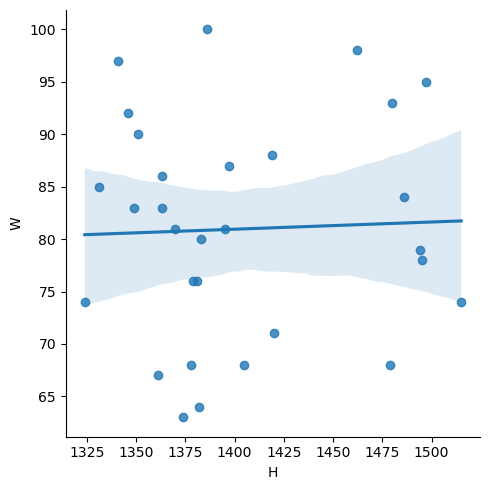

In [101]:
sns.lmplot(x='H',y='W',data=df,palette='colorblind')

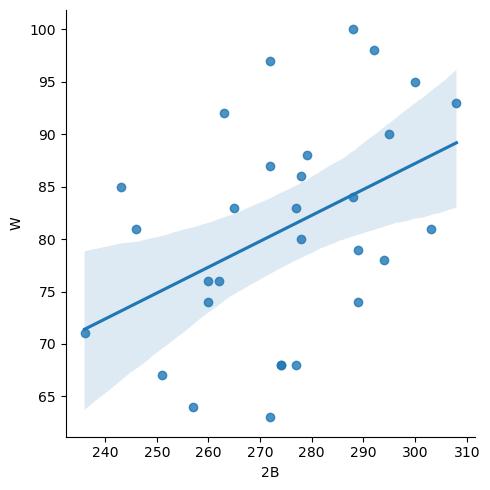

In [102]:
sns.lmplot(x='2B',y='W',data=df,palette='colorblind')

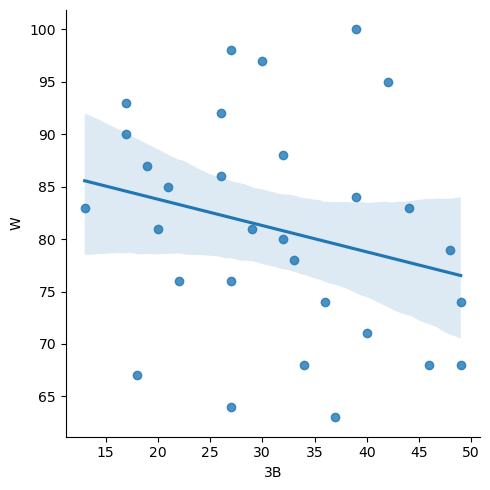

In [39]:
sns.lmplot(x='3B',y='W',data=df,palette='colorblind')

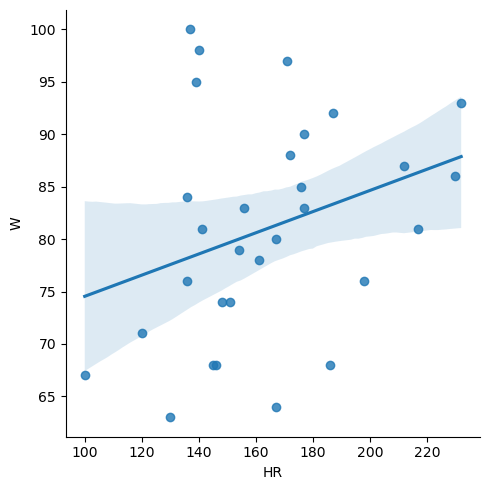

In [103]:
sns.lmplot(x='HR',y='W',data=df,palette='colorblind')

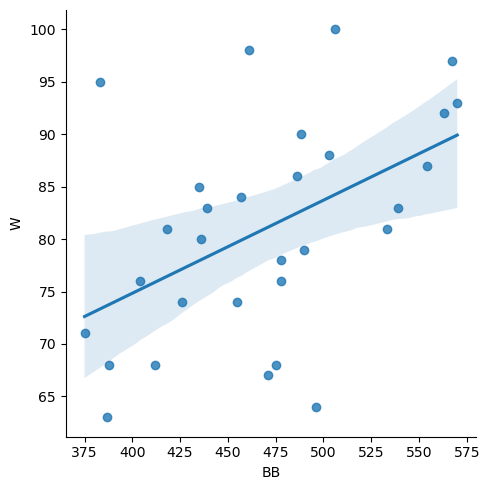

In [104]:
sns.lmplot(x='BB',y='W',data=df,palette='colorblind')

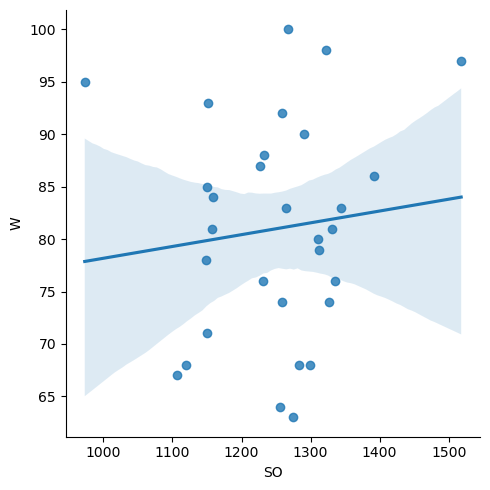

In [105]:
sns.lmplot(x='SO',y='W',data=df,palette='colorblind')

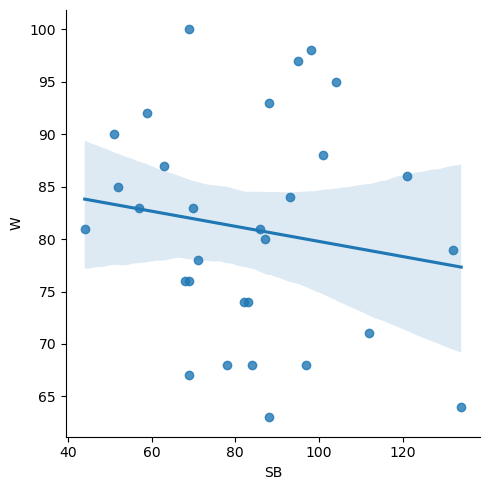

In [106]:
sns.lmplot(x='SB',y='W',data=df,palette='colorblind')

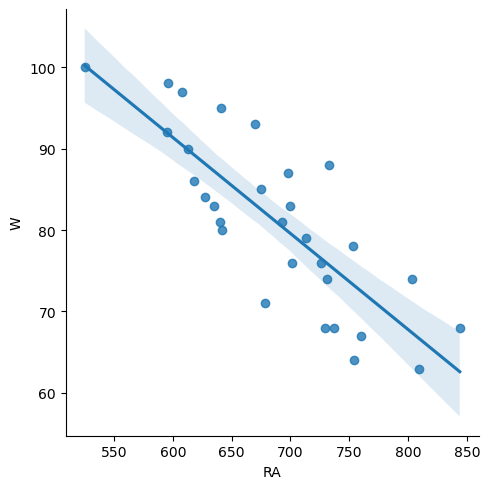

In [107]:
sns.lmplot(x='RA',y='W',data=df,palette='colorblind')

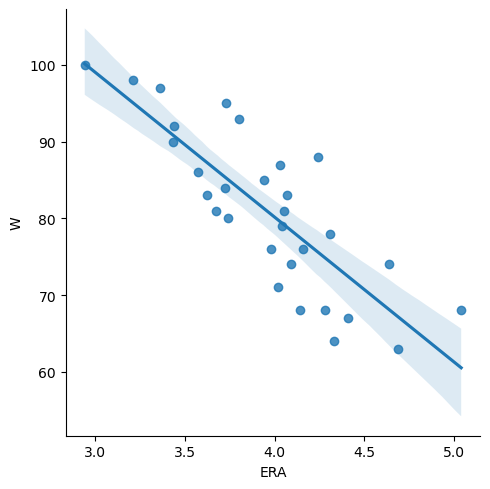

In [108]:
sns.lmplot(x='ERA',y='W',data=df,palette='colorblind')

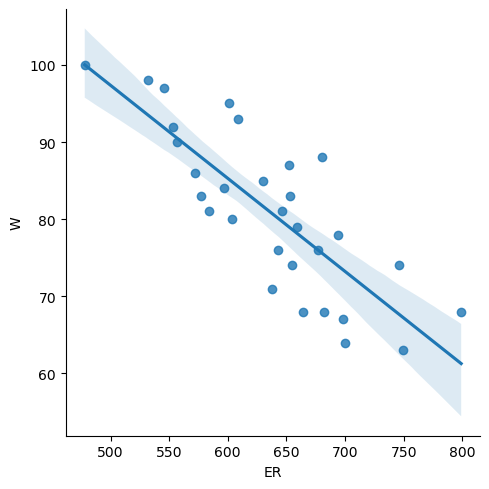

In [109]:
sns.lmplot(x='ER',y='W',data=df,palette='colorblind')

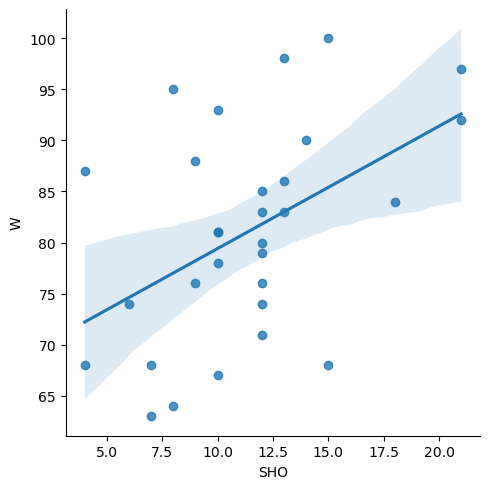

In [110]:
sns.lmplot(x='SHO',y='W',data=df,palette='colorblind')

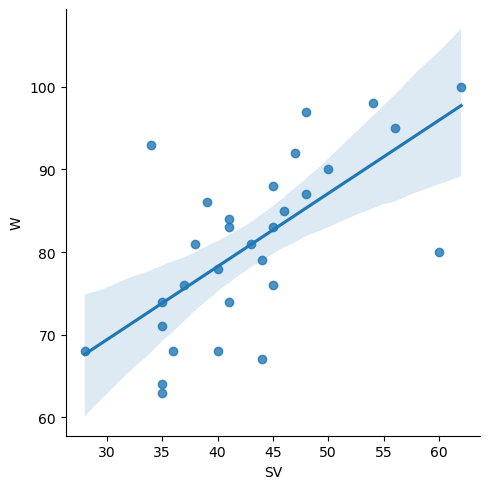

In [111]:
sns.lmplot(x='SV',y='W',data=df,palette='colorblind')

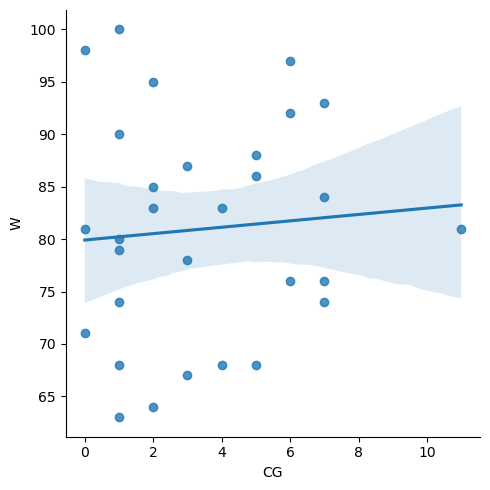

In [112]:
sns.lmplot(x='CG',y='W',data=df,palette='colorblind')

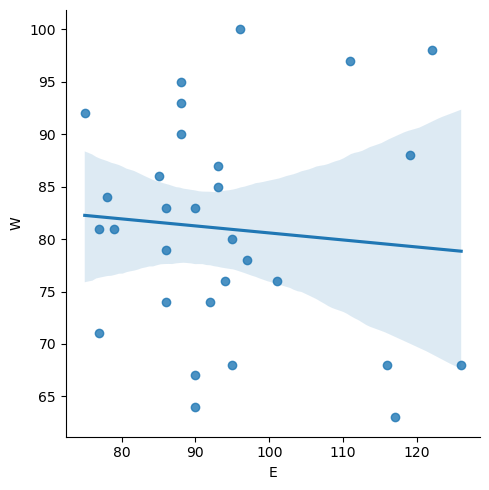

In [113]:
sns.lmplot(x='E',y='W',data=df,palette='colorblind')

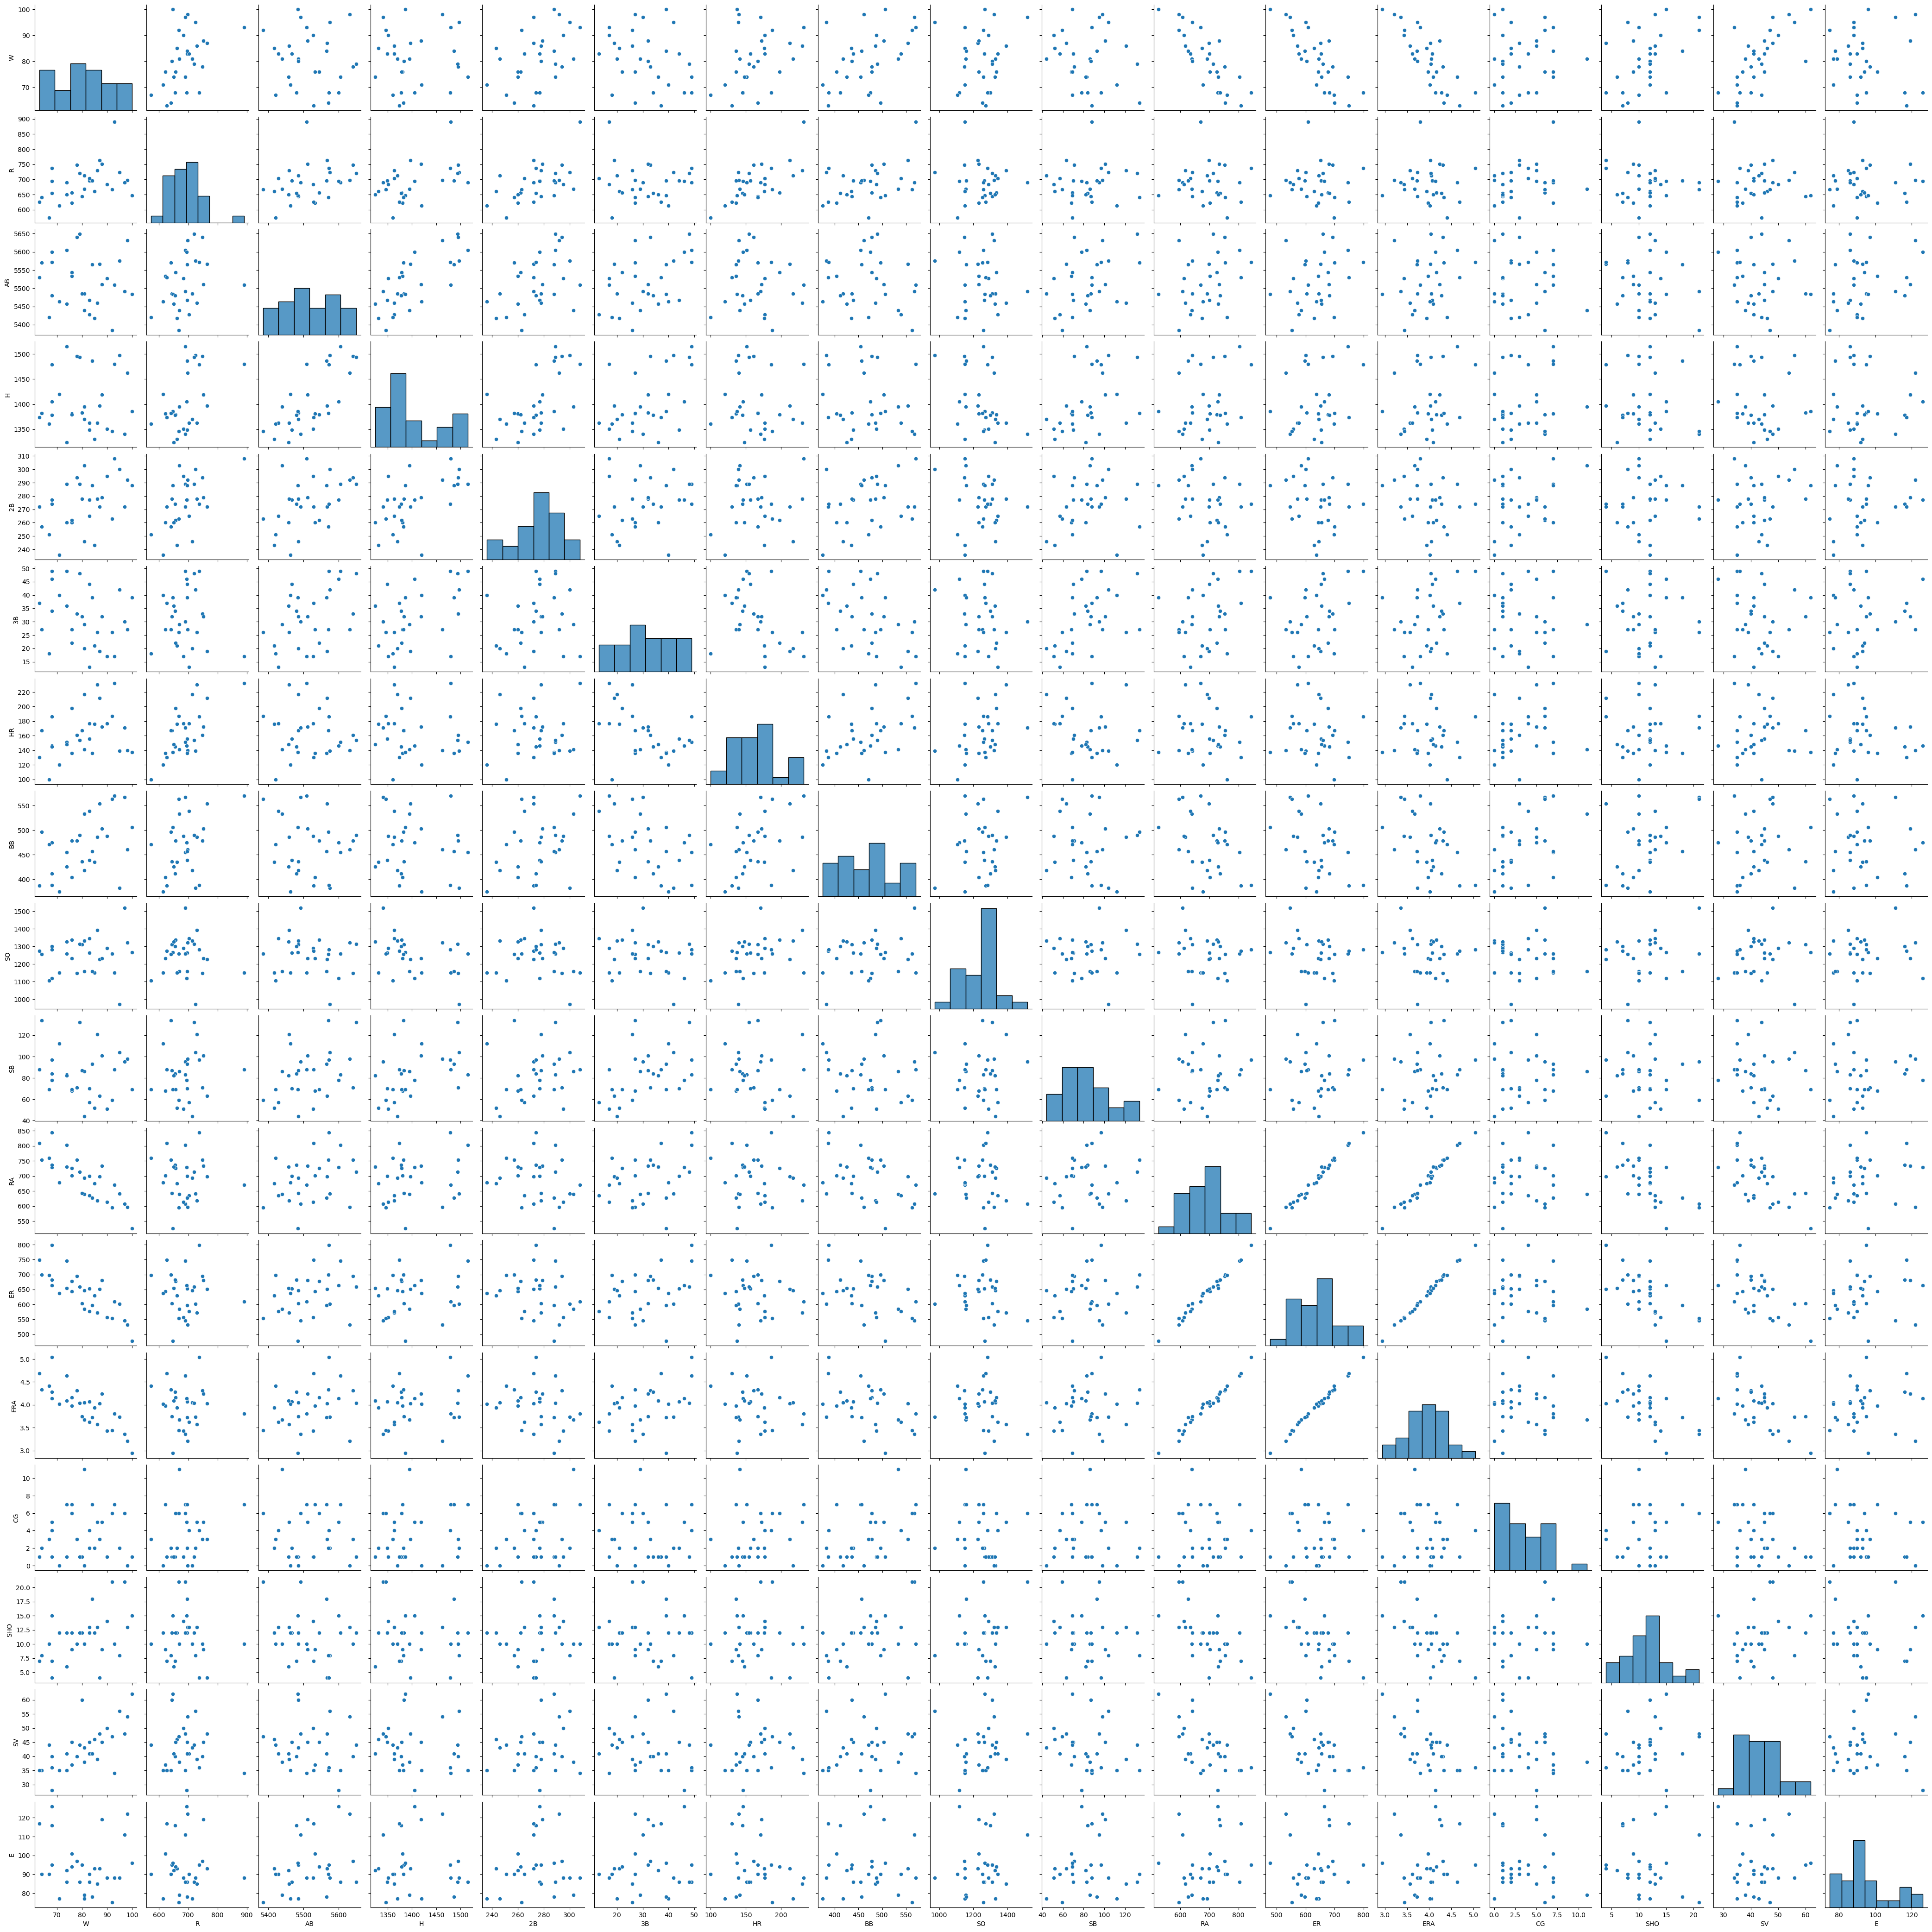

In [114]:
#Multivariate Analysis
sns.pairplot(data =df,palette="Dark2")
plt.show()#by viewing pairs of variables,it evident that there is some linear distribution in some of them.

In [115]:
#Tabular view of Correlation
cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<Axes: >

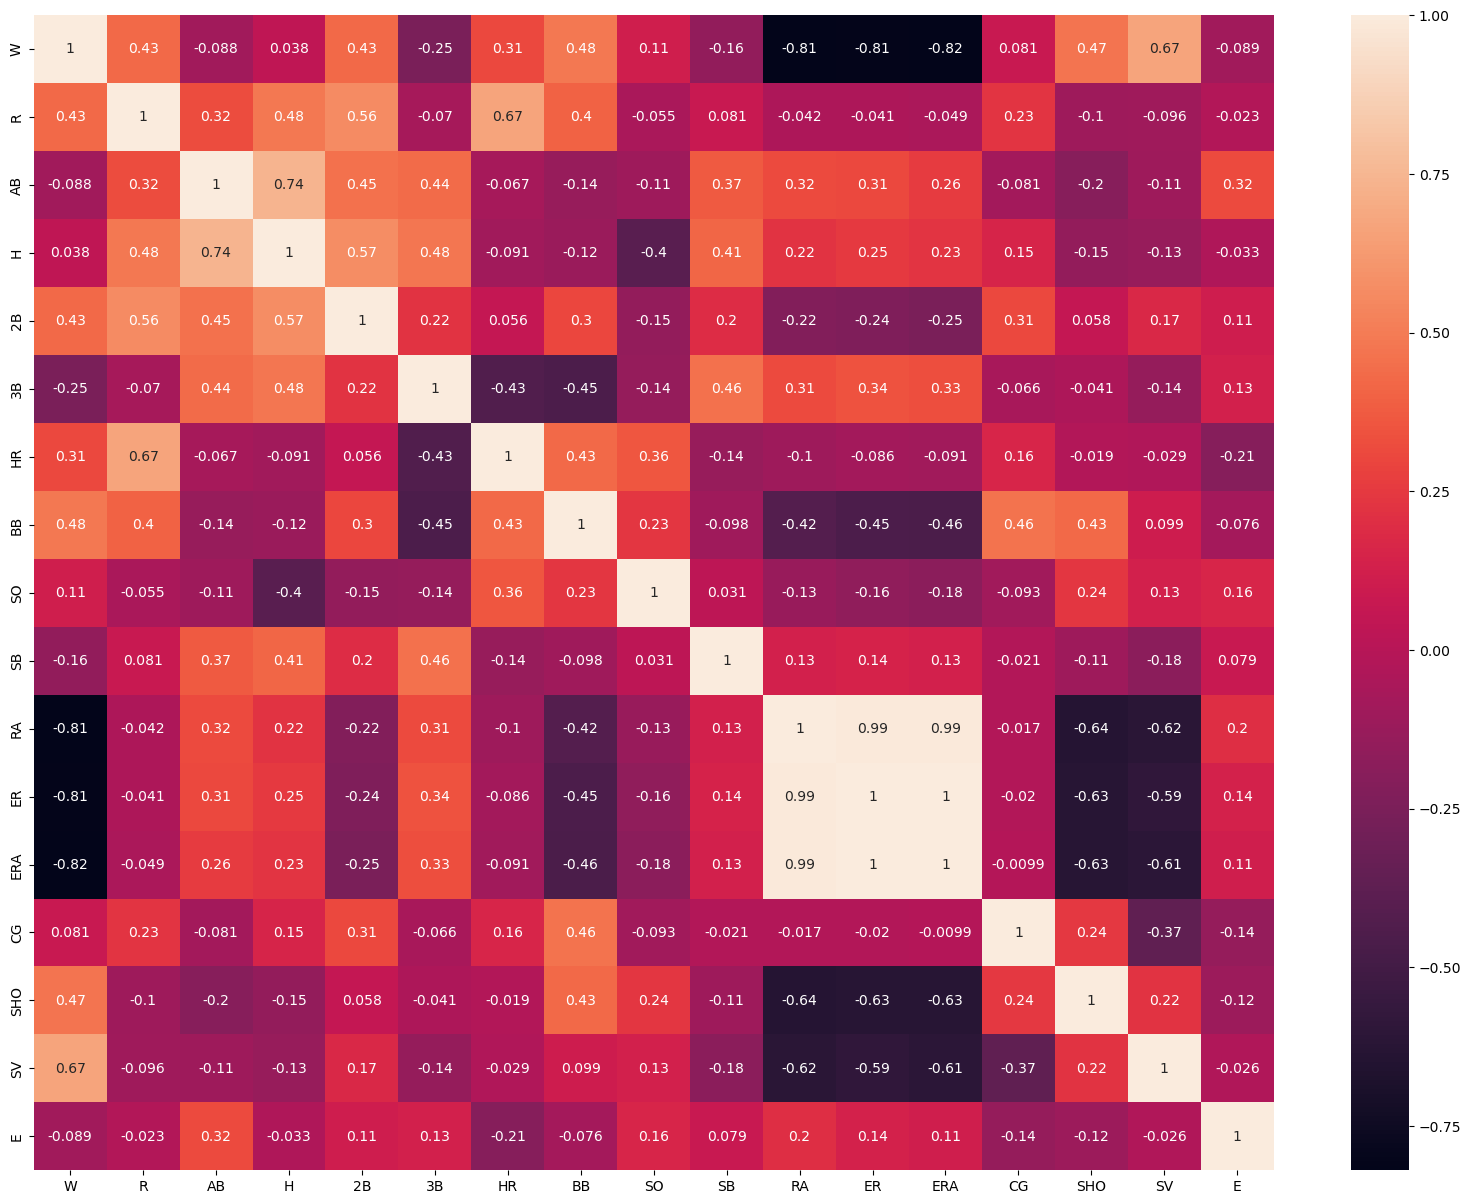

In [116]:
#Visualizing the correlation matrix by plotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr(),annot=True)

#In the heatmap below  it is evident that RA,ER,ERA columns are highly correlated with each other indicated by the figure value.  On the same columns there is a high negative correlation with Wins(W) columns that means there is a great influence  of these columns on winning.Some of the columns are moderately correlated.
#there is multicollinearity will  be removed by standard scaling and also be dealt with by the VIF tool

In [117]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
#'W' the target variable is not subjected to outlier removal
from scipy.stats import zscore
out_features=df[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']]
z=np.abs(zscore(out_features))
z

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [118]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(29, 17)

In [119]:
#shape of old and new dataframe
print("Original Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Original Data Frame- 30
New Data Frame- 29


In [120]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)#there is a 3.3% data loss when using zscore to remove outliers

Data Loss Percentage- 3.3333333333333335


In [121]:
#new dataframe after removing outliers buy use of zscoew
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [122]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(20, 17)

In [123]:
print("Data Loss Percentage-",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage- 33.33333333333333


In [ ]:
#the interquartile range method will result in loss of data above the acceptable 10% loss,therefore  I will select Z score as the best method

In [124]:
df=df1

In [185]:
df#this is the datafarme I will use going forward

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [125]:
#Checking for Skewness
df.skew()

#Skeweness is acceptable only within the range of -0.5 and 0.5.On that basis,the columns Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E) fall short of that criteria.

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [126]:
#Removing skeweness in H using cuberoot method
df['H']=np.cbrt(df['H'])

In [127]:
#check for skeweness again
df.skew()#cuberoot method did not work

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [128]:
#Removing skeweness in H using log1p method
df["H"]=np.log1p(df["H"])


In [129]:
#check for skeweness again
df.skew()#log1p method did not work

W      0.119013
R     -0.215364
AB     0.169573
H      0.739679
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [130]:
#Removing skeweness using yeo johnson method  (this is the suitable method because the skewness values are positive)
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [131]:
#Removing skewness using yeo-johnson
df[['E','SHO','SV','CG','H']] = scaler.fit_transform(df[['E','SHO','SV','CG','H']].values)

In [132]:
#check for skeweness again
df.skew()#skeweness successfully removed from all the relevant columns

W      0.119013
R     -0.215364
AB     0.169573
H      0.638382
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

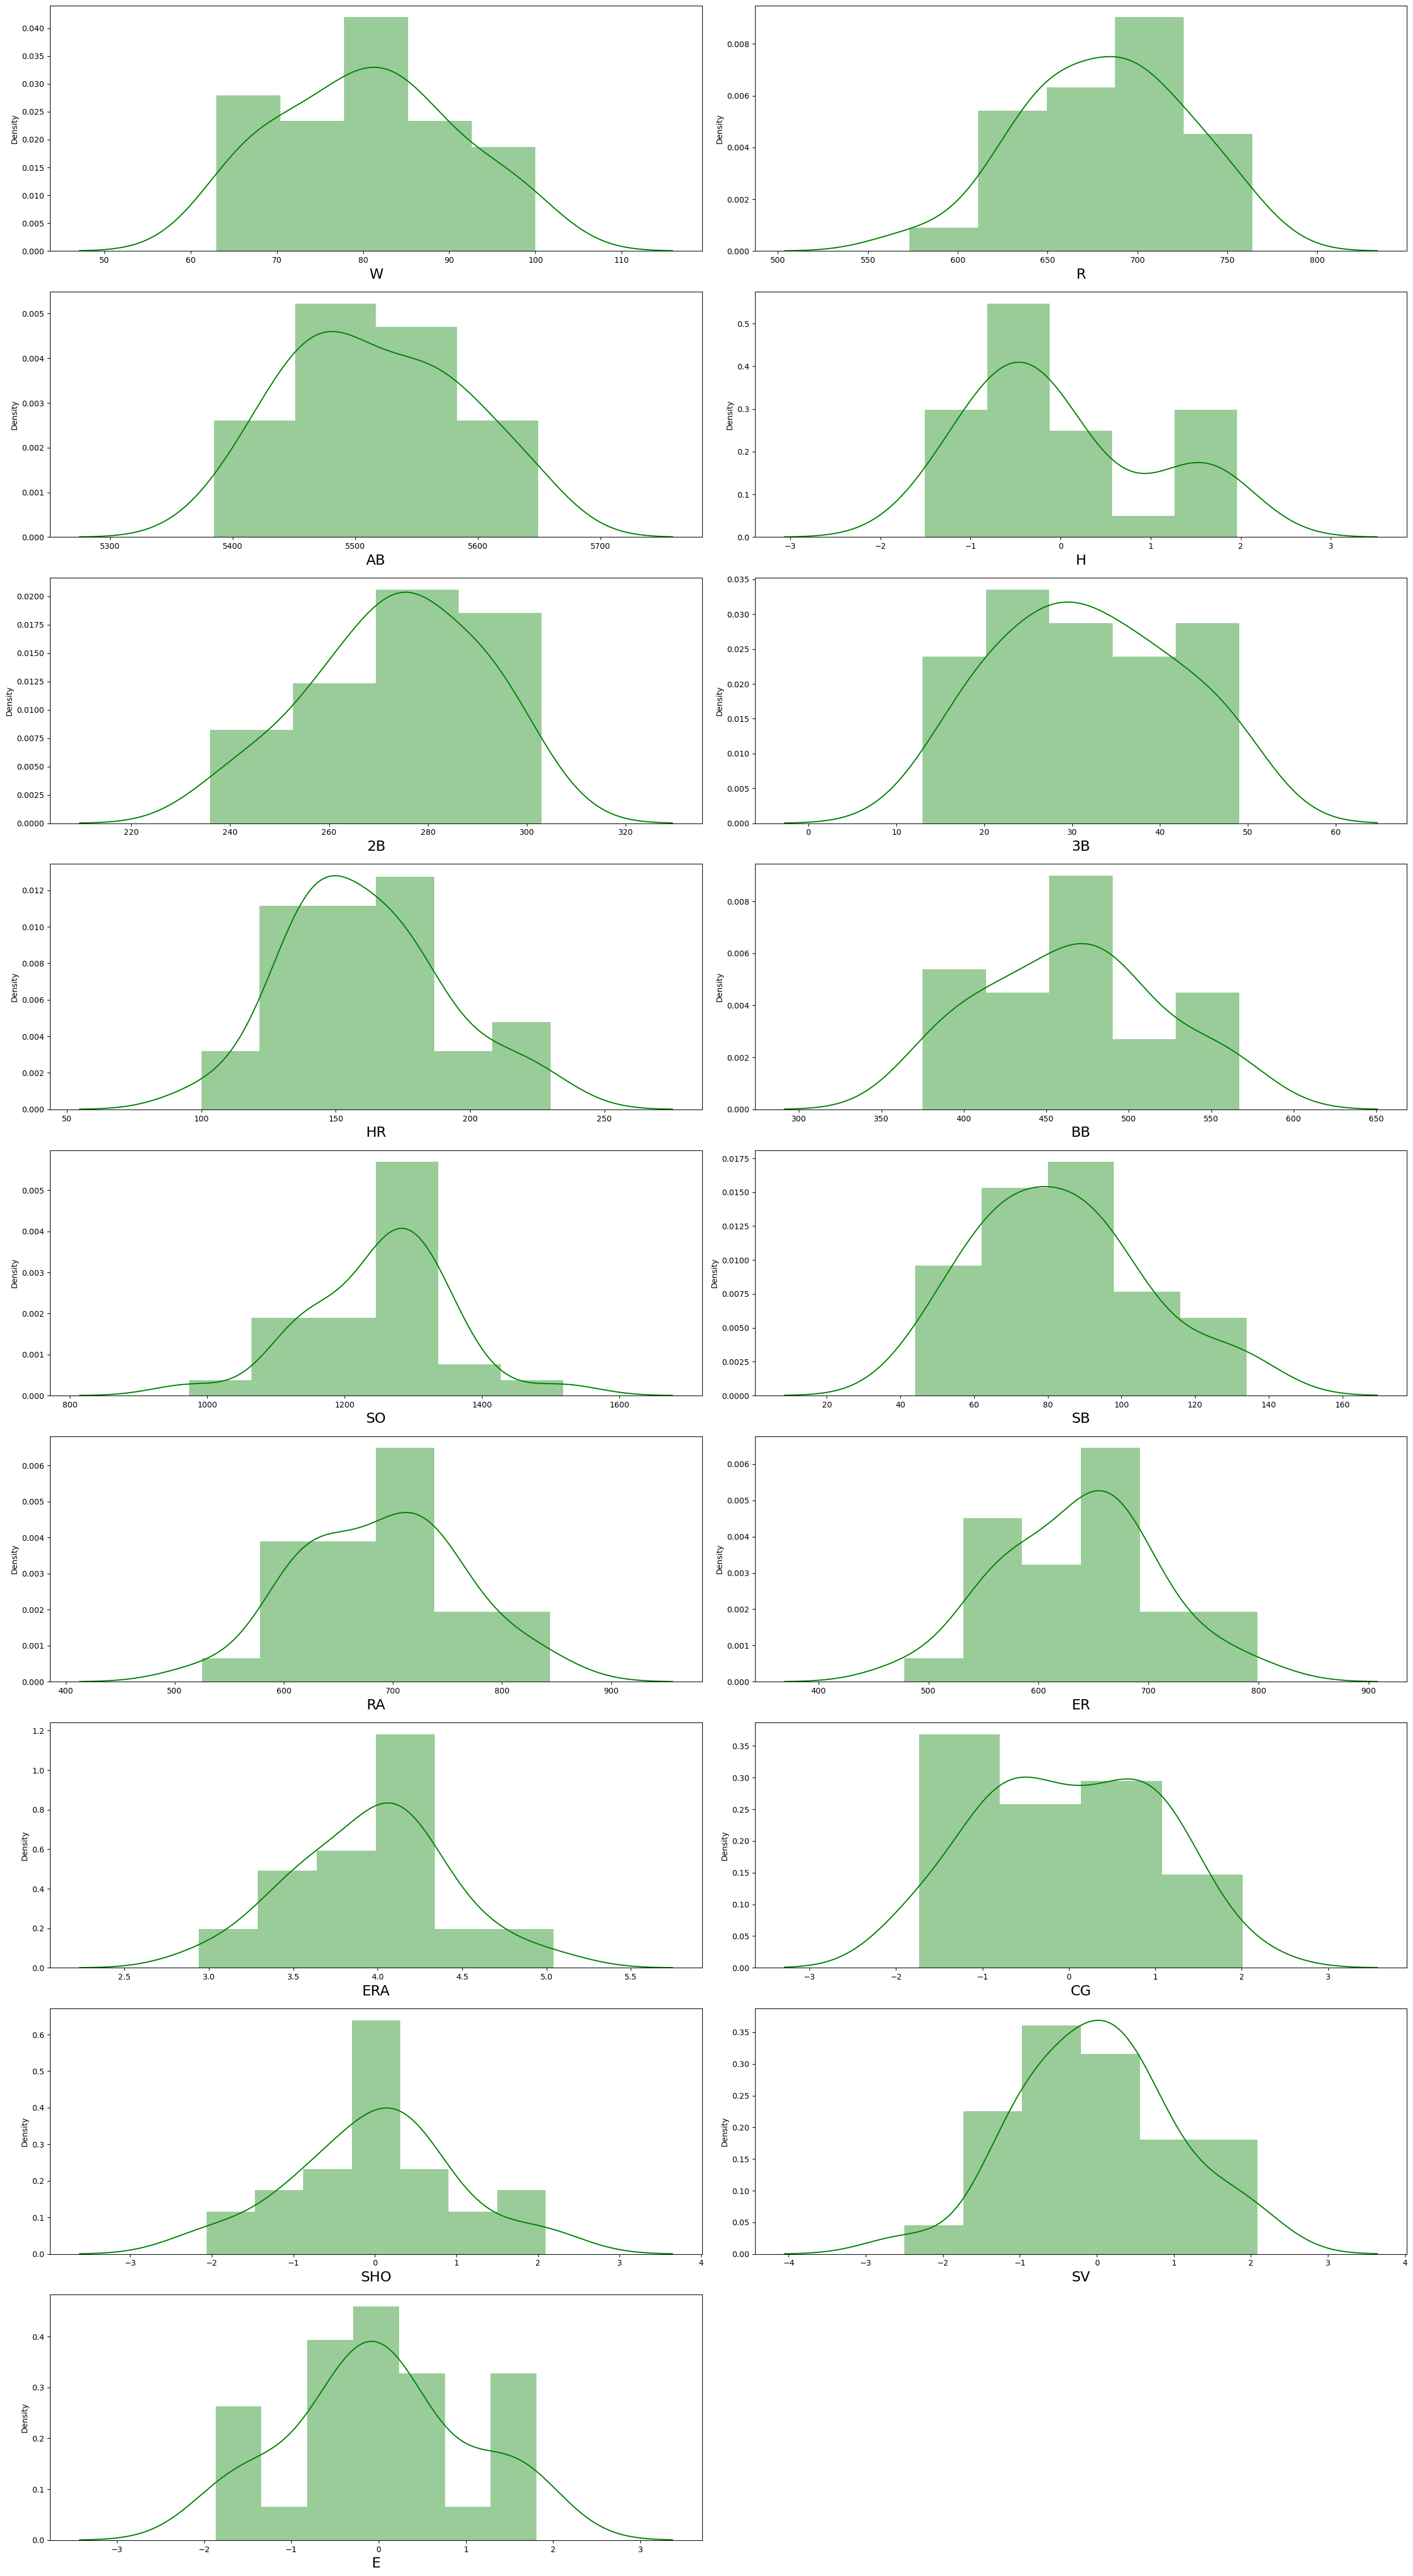

In [133]:
#Visualize distribution of data after removing skeweness from columns Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E)

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()#the rest of the graphs remain unchanged while those where skeweness was removed are now different

In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels

In [134]:
#seperate the target and independent variables into x and y
x=df.drop("W",axis=1)
y=df["W"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (29, 16)
Label Dimension= (29,)


In [135]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.698247,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.984235,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.049887,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.321150,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,1.954439,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.004677,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.532131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.291009,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.668107,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.402216,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


In [136]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,6.996978,R
1,20.294006,AB
2,9.840591,H
3,3.526091,2B
4,3.236542,3B
5,8.710431,HR
6,3.290491,BB
7,2.814429,SO
8,1.946051,SB
9,204.400203,RA


In [ ]:
#VIF values above 10 are were multicolinearity exists.In RA,ER,ERA. So let me drop the columns starting with that with the highest VIF value to avoid multicolinearity.

In [137]:
#Droping ER
x = x.drop(["ER"],axis=1)

In [138]:
x.head()#checking the if the column has been removed

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.698247,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.984235,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.049887,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.321150,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,1.954439,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820


In [139]:
#check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif#vif is still high in RA and ERa respectively so this should be removed in the same manner

,VIF values,Features
0,5.893299,R
1,7.975359,AB
2,9.137264,H
3,3.229353,2B
4,3.137606,3B
5,7.407229,HR
6,3.287913,BB
7,2.789578,SO
8,1.783229,SB
9,148.343051,RA


In [140]:
#dropping ERA feature
x = x.drop(["ERA"],axis=1)

In [141]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,5.834879,R
1,5.127373,AB
2,7.278883,H
3,3.165834,2B
4,2.982546,3B
5,6.019888,HR
6,3.014516,BB
7,2.293378,SO
8,1.771867,SB
9,4.685919,RA


In [ ]:
#All VIF values are now below 10.This means that multicollinearity/biasness has been solved so we can proceeed with model building

In [142]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [143]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.9607386540561064 at random_state 189


In [144]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [145]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: -0.20043995734738984
R2_score on training data: 97.72309861084565
Mean Absolute Error:- 8.627415204481249
Mean Squared Error:- 96.86049905846752
Root Mean Squared Error:- 9.841773166379499


In [146]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.31518512780790053
R2_score on training data: 94.93254684076376
Mean Absolute Error:- 6.029999999999999
Mean Squared Error:- 55.25600000000003
Root Mean Squared Error:- 7.433437966378682


In [147]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.019550735863672064
R2_score on training data: 67.66471403657826
Mean Absolute Error:- 7.299999999999999
Mean Squared Error:- 79.10999999999996
Root Mean Squared Error:- 8.894380248224154


In [149]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: -0.14803814579375962
R2_score on training data: 99.99999638400556
Mean Absolute Error:- 8.166993103823975
Mean Squared Error:- 92.63232788873398
Root Mean Squared Error:- 9.62456897158174


In [150]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.8079002964198052
R2_score on training data: 88.74787276312762
Mean Absolute Error:- 3.3002102857801567
Mean Squared Error:- 15.500044832626964
Root Mean Squared Error:- 3.9370096307511067


In [151]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.6750937741277658
R2_score on training data: 94.78769311507304
Mean Absolute Error:- 4.416016877854496
Mean Squared Error:- 26.21587110006589
Root Mean Squared Error:- 5.120143660100358


In [152]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: -0.7474825716498839
R2_score on training data: 100.0
Mean Absolute Error:- 9.75
Mean Squared Error:- 141.0
Root Mean Squared Error:- 11.874342087037917


In [153]:
#Cross validation Score-to compare and select an appropriate model for the predictive modelling problem.It prevents overfitting
from sklearn.model_selection import cross_val_score

In [154]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LR)-score.mean())*100)

[ 0.35695585 -0.8699736   0.6477426   0.78457437  0.59089846]
0.302039536457991
Difference between R2 score and cross validation score is - -50.24794938053808


In [155]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RFR)-score.mean())*100)

[ 0.40883261 -4.68841711  0.47373258  0.41064918  0.89389328]
-0.5002618904973584
Difference between R2 score and cross validation score is - 81.5447018305259


In [156]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_knn)-score.mean())*100)

[ 0.30113636 -2.25105263  0.36716018  0.24990164  0.63254717]
-0.14006145495271638
Difference between R2 score and cross validation score is - 15.961219081638845


In [157]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_GBR)-score.mean())*100)

[ 0.04155821 -8.98035863  0.49684593  0.50405215  0.65490505]
-1.456599457123042
Difference between R2 score and cross validation score is - 130.85613113292825


In [158]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_lasso)-score.mean())*100)

[ 0.73209736 -0.82850933  0.75601063  0.73441699  0.91257036]
0.46131720223639555
Difference between R2 score and cross validation score is - 34.65830941834096


In [159]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[ 0.44602021 -0.99034228  0.65618811  0.90086874  0.74799437]
0.35214582945588674
Difference between R2 score and cross validation score is - 0.3229479446718791


In [160]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_dtr)-score.mean())*100)

[ -2.         -10.19736842   0.32831451   0.19344262   0.53714623]
-2.22769301178611
Difference between R2 score and cross validation score is - 148.0210440136226


In [ ]:
#Model Selection
##Linear Regression model is the best because it has the least difference between R2 score and cross validation scorerfoming  model


In [162]:
#Hyper parameter tuning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
parameters={'n_jobs':[1.0,0.5,0.2,None],
            'positive':[True,False],
            'fit_intercept':[True,False],
           'copy_X':[True,False]}

GVC=GridSearchCV(LinearRegression(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'fit_intercept':True,'n_jobs':None,'positive':False,'copy_X':True}

Final_model=LinearRegression(copy_X=True,fit_intercept=True,positive=False,n_jobs=None)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: -0.20043995734738984
Mean Absolute Error:- 8.627415204481249
Mean Squared Error:- 96.86049905846752
Root Mean Squared Error:- 9.841773166379499


In [163]:
#Saving the model
import joblib
joblib.dump(Final_model,"Baseball_Case_Study.pkl")

['Baseball_Case_Study.pkl']

In [164]:
#Loading the saved model to get predictions
model=joblib.load("Baseball_Case_Study.pkl")

In [165]:
#Prediction
prediction=model.predict(x_test)
prediction

array([82.72596497, 75.69165535, 85.1899615 , 94.51117924, 90.99936208,
       83.75755231, 82.76906298, 97.72365263])

In [166]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,82.725965,98
1,75.691655,76
2,85.189962,79
3,94.511179,84
4,90.999362,100
5,83.757552,88
6,82.769063,74
7,97.723653,83
